In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d

In [30]:
state0 = xr.open_dataset('/Users/weiyang/Desktop/delZ12345/state_002.nc')
state = state0.isel(Y = range(1,10)) # Remove the boundary walls in y direction

<xarray.DataArray 'T' (T: 21)>
array([     0.,  43200.,  86400., 129600., 172800., 216000., 259200., 302400.,
       345600., 388800., 432000., 475200., 518400., 561600., 604800., 648000.,
       691200., 734400., 777600., 820800., 864000.])
Coordinates:
  * T        (T) float64 0.0 4.32e+04 8.64e+04 ... 7.776e+05 8.208e+05 8.64e+05
Attributes:
    long_name:  model_time
    units:      s

In [39]:

xloc = 28 # Location in x-axsis 0~50
Qsg = 200
sill_depth = 12
#Zgrid = int(sill_depth / 3)
grid_size = 200 * 3
z1 = np.arange(-1.5,-150,-3)
z0 = state.Z.data
y0 = state.Y.data

import numpy.ma as ma
Q_out, Q_in = np.empty(len(state.T)), np.empty(len(state.T))
Q = np.empty(len(state.T))

for i in range(len(state.T)):
    u = state.U.isel(T = i)
    u_center = (u.data[:, :, 1:] + u.data[:, :, :-1]) / 2
    u_corr = ma.masked_values (u_center, 0.) # Mask out non-value cells where u = 0.
    u_sec = u_corr[:, :, xloc]
    f_u1 = interp2d(y0, z0, u_sec) # Interpolate in Z direction
    u_sec_interp = f_u1(y0, z1)
    Qs = u_sec_interp * grid_size
    Q[i] = Qs.sum()
    Q_out[i] = Qs[Qs > 0].sum()
    Q_in[i] = Qs[Qs < 0].sum()

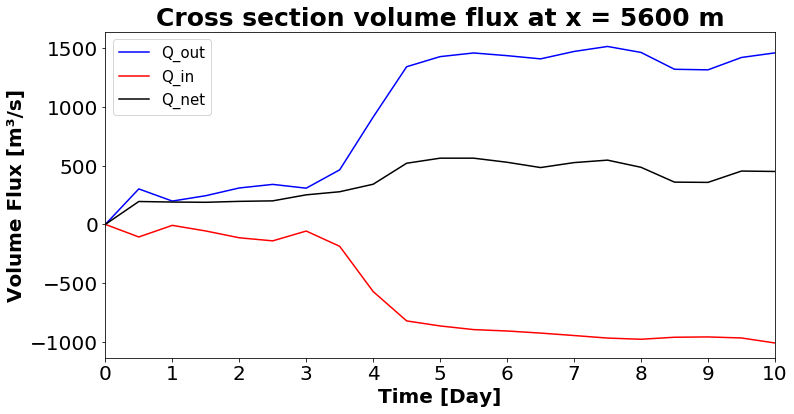

In [42]:
fig, ax =plt.subplots(figsize=(12,6))
ax.set_xlim([0,20])
ax.set_xticks(np.linspace(0,20,11))
ax.set_xticklabels(np.linspace(0,10,11, dtype = int), size = 20)
#ax.set_ylim([0,4000])
#ax.set_yticks(np.linspace(0,4000,9))
#ax.set_yticklabels(np.linspace(0,4000,9, dtype = int), size = 20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlabel("Time [Day]", size = 20, weight = 'bold')
plt.ylabel("Volume Flux [m\u00B3/s]", size = 20, weight = 'bold')
plt.plot(Q_out, "b-", linewidth=1.5, label='Q_out')
plt.plot(Q_in, "r-", linewidth=1.5, label='Q_in')
plt.plot(Q, "k-", linewidth=1.5, label='Q_net')
plt.legend(loc = 'upper left', fontsize = 15)
#plt.text(0, 3800, r'$sill$ $depth$: ' + str(sill_depth) + ' $m$', {'color': 'C2','fontsize': 15})
#plt.text(0, 3500, r'$Q_{sg}$: ' + str(Qsg) + ' $m\u00B3/s$', {'color': 'C2','fontsize': 15})
plt.title("Cross section volume flux at x = " + str(xloc*200) + ' m', size = 25, weight = 'bold')
#fig.autofmt_xdate(rotation=50)  
plt.show()